In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Example data (replace this with your actual data)
data = {
    'Category': ['GCM', 'GCM', 'GCM', 'GCM', 'GCM', 'GCM', 'GCM', 'GCM','GCM', 'GCM', 'GCM', 'GCM', 'GCM', 'GCM',
                 'GCM','GCM', 
                 'RCM', 'RCM', 'RCM', 'RCM', 
                 'RCM', 'RCM', 'RCM', 'RCM', 
                 'ICON', 'ICON', 'ICON'],
    
    'Period': ['1', '1','1','1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
               '2', '3', 
               '1.1', '1.1','1.1','1.1',
               '2.1', '2.1', '3.1', '3.1', 
               '1.2', '2.2', '3.2'],
    
    'Precipitation': [0, -1.34, -1.76, -1.4, -0.81, -0.28, -0.27, -0.99, -0.73, -0.79, -0.38, -3.3, -0.17, -1.24, # Lejeune et al table3 + Ramos (08)
                      -1.15, -0.61,  # Shukla
                      -0.63, -0.05, -0.41, -0.22, # Correia et al; Llopart et al; Moore et al; Lejeune et al
                      -0.7, -0.93, -0.57, -0.6, #Correia et al; Lejeune et al
                      -0.27, -0.60, -0.26],
}

df = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in data.items() ]))

# Define the x-axis positions for each period (Annual, Dry, Wet)
x_positions = {'Annual': 1, 'Dry': 2, 'Wet': 3}

# Define marker styles for each category
marker_styles = {'GCM': 'O', 'RCM': '^', 'ICON': 's'}
#marker_styles = {'o', 's', '^'}  #1, 3, 2
colors = {'GCM':'black', 'RCM':'red', 'ICON':'blue'}
#marker_styles = {'GCM': 'O', 'RCM': '^', 'ICON': 's'}


In [3]:
df["color"] = df.apply(lambda x: colors[x["Category"]], axis=1)
df["marker"] = df.apply(lambda x: marker_styles[x["Category"]], axis=1)

In [4]:
df

,Category,Period,Precipitation,color,marker
0,GCM,1,0.00,black,O
1,GCM,1,-1.34,black,O
2,GCM,1,-1.76,black,O
3,GCM,1,-1.40,black,O
4,GCM,1,-0.81,black,O
5,GCM,1,-0.28,black,O
6,GCM,1,-0.27,black,O
7,GCM,1,-0.99,black,O
8,GCM,1,-0.73,black,O
9,GCM,1,-0.79,black,O


_change to numpy series_

In [4]:
# gcm
gcm_x = df[df['Category'] == 'GCM']['Period'].values
gcm_y = df[df['Category'] == 'GCM']['Precipitation'].values

In [5]:
gcm_x_numplot = [float(i) for i in gcm_x]
gcm_y_numplot = [float(i) for i in gcm_y]

In [6]:
#rcm
rcm_x = df[df['Category'] == 'RCM']['Period'].values
rcm_y = df[df['Category'] == 'RCM']['Precipitation'].values

In [7]:
rcm_x_numplot = [float(i) for i in rcm_x]
rcm_y_numplot = [float(i) for i in rcm_y]

In [8]:
icon_x = df[df['Category'] == 'ICON']['Period'].values
icon_y = df[df['Category'] == 'ICON']['Precipitation'].values

In [9]:
icon_x_numplot = [float(i) for i in icon_x]
icon_y_numplot = [float(i) for i in icon_y]

## plot graphes

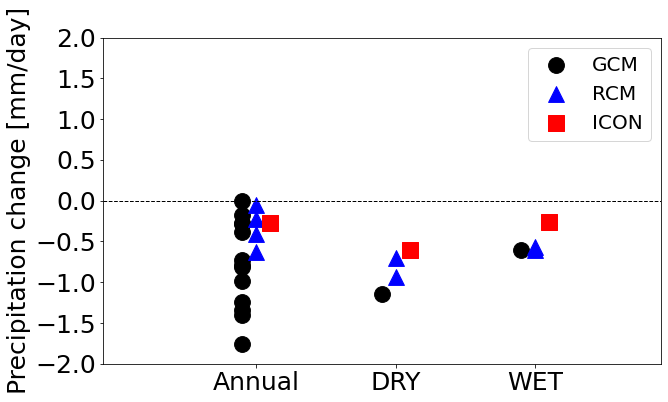

In [12]:
marker = ['o', '^', 's']
colors = ['black', 'blue', 'red']

fig, ax = plt.subplots(figsize=(10,6))
ax.axhline(y=0, color='black', linewidth=1.0, linestyle='--')
ax.scatter(gcm_x_numplot,gcm_y_numplot, marker='o', color='black', s=250, label='GCM')
ax.scatter(rcm_x_numplot,rcm_y_numplot, marker='^', color='blue', s=250, label='RCM')
ax.scatter(icon_x_numplot,icon_y_numplot, marker='s', color='red', s=250, label='ICON')


ax.legend(fontsize=20)
plt.xticks([1.1,2.1,3.1],['Annual','DRY','WET'],fontsize=25)
plt.yticks(fontsize=25)
plt.ylabel('Precipitation change [mm/day]',fontsize=25)
plt.xlim(0, 4)
plt.ylim(-2, 2)

plt.show()

## Linear plot between PR and ET

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Example data (replace this with your actual data)
data = {
    'Paper': ['GCM_T3','GCM_B3', 'GCM', 'GCM', 'GCM','GCM', 'GCM_T3', 'GCM_B3', 'GCM','GCM', 'GCM', 'GCM', 'RCM','RCM_B3','RCM_T3','ICON'],
    'ET': [-0.7, -0.85, -1.43, -0.7, -0.55, -0.38, -0.76, -0.41, -0.61, -0.65, -1.30, -1.25, -1.28, -0.4, -0.55, -2.10], # gcm 11, rcm 2, icon
    'PR': [-1.24, -1.34, -1.76, -1.4, -0.81, -0.28, -0.27, -0.99, -0.73, -0.79, -0.38, -0.17, -0.63, -0.22, -0.06, -0.27]}

df = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in data.items() ]))

# Define the x-axis positions for each period (Annual, Dry, Wet)
x_positions = {'Annual': 1, 'Dry': 2, 'Wet': 3}

# Define marker styles for each category
marker_styles = {'GCM': 'O', 'RCM': 'O', 'ICON': 'O', 'GCM_T3': '^', 'GCM_B3': 'v', 'RCM_T3': '^', 'RCM_B3': 'v'}
#marker_styles = {'o', 's', '^'}  #1, 3, 2
colors = {'GCM':'black', 'RCM':'blue', 'ICON':'red', 'GCM_T3': 'black', 'GCM_B3': 'black', 'RCM_T3': 'blue', 'RCM_B3': 'blue'}
#marker_styles = {'GCM': 'O', 'RCM': '^', 'ICON': 's'}

_Revised table: Final version_

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Example data (replace this with your actual data) # GCM 16, RCM 5, ICON 1
data = {
    'Paper': ['GCM','GCM', 'GCM', 'GCM', 'GCM','GCM', 'GCM', 'GCM', 'GCM', 'GCM', 'GCM', 'GCM', 'GCM', 'GCM', 'GCM', 'GCM', 'RCM','RCM','RCM','RCM','RCM','ICON'],
    'ET': [-0.85, -1.43, -0.7, -0.55, -0.33, -0.30, -0.41, -0.61, -0.65, -1.30, -0.59, -0.71, np.nan, -0.04, np.nan, np.nan, np.nan, -0.88, -1.28, -0.4, -0.55, -2.10], # gcm 11, rcm 2, icon
    'PR': [-1.34, -1.76, -1.4, -0.81, -0.28, -0.30, -0.99, -0.73, -0.79, -0.38, -0.81, -1.25, -3.3, -0.17,-1.38, -1.15, -0.41, -1.00, -1.29, -0.22, -0.06, -0.27]}

df = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in data.items() ]))

# Define the x-axis positions for each period (Annual, Dry, Wet)
x_positions = {'Annual': 1, 'Dry': 2, 'Wet': 3}

# Define marker styles for each category
marker_styles = {'GCM': 'O', 'RCM': 'O', 'ICON': 'O'}
#marker_styles = {'o', 's', '^'}  #1, 3, 2
colors = {'GCM':'black', 'RCM':'blue', 'ICON':'red'}
#marker_styles = {'GCM': 'O', 'RCM': '^', 'ICON': 's'}

In [17]:
df

,Paper,ET,PR
0,GCM,-0.85,-1.34
1,GCM,-1.43,-1.76
2,GCM,-0.70,-1.40
3,GCM,-0.55,-0.81
4,GCM,-0.33,-0.28
5,GCM,-0.30,-0.30
6,GCM,-0.41,-0.99
7,GCM,-0.61,-0.73
8,GCM,-0.65,-0.79
9,GCM,-1.30,-0.38


In [18]:
# gcm
gcm_x = df[df['Paper'] == 'GCM']['ET'].values
gcm_y = df[df['Paper'] == 'GCM']['PR'].values

In [19]:
gcm_x_numplot = [float(i) for i in gcm_x]
gcm_y_numplot = [float(i) for i in gcm_y]

In [20]:
#rcm
rcm_x = df[df['Paper'] == 'RCM']['ET'].values
rcm_y = df[df['Paper'] == 'RCM']['PR'].values

In [21]:
rcm_x_numplot = [float(i) for i in rcm_x]
rcm_y_numplot = [float(i) for i in rcm_y]

In [22]:
icon_x = df[df['Paper'] == 'ICON']['ET'].values
icon_y = df[df['Paper'] == 'ICON']['PR'].values

In [23]:
icon_x_numplot = [float(i) for i in icon_x]
icon_y_numplot = [float(i) for i in icon_y]

In [19]:
# only when it has top and bottom
# top3
gcm_t3_x = df[df['Paper'] == 'GCM_T3']['ET'].values
gcm_t3_y = df[df['Paper'] == 'GCM_T3']['PR'].values
rcm_t3_x = df[df['Paper'] == 'RCM_T3']['ET'].values
rcm_t3_y = df[df['Paper'] == 'RCM_T3']['PR'].values

# bottom3
gcm_b3_x = df[df['Paper'] == 'GCM_B3']['ET'].values
gcm_b3_y = df[df['Paper'] == 'GCM_B3']['PR'].values
rcm_b3_x = df[df['Paper'] == 'RCM_B3']['ET'].values
rcm_b3_y = df[df['Paper'] == 'RCM_B3']['PR'].values

In [20]:
gcm_t3_x_numplot = [float(i) for i in gcm_t3_x]
gcm_t3_y_numplot = [float(i) for i in gcm_t3_y]

gcm_b3_x_numplot = [float(i) for i in gcm_b3_x]
gcm_b3_y_numplot = [float(i) for i in gcm_b3_y]

rcm_t3_x_numplot = [float(i) for i in rcm_t3_x]
rcm_t3_y_numplot = [float(i) for i in rcm_t3_y]

rcm_b3_x_numplot = [float(i) for i in rcm_b3_x]
rcm_b3_y_numplot = [float(i) for i in rcm_b3_y]

### Plot graph

In [43]:
filtered_gcm_et = [-0.33, -0.76, -1.30, -0.04] 
filtered_rcm_et = [ -0.4, -0.55, -1.28]
filtered_gcm_pr = [-0.28, -0.27, -0.38, -0.17] 
filtered_rcm_pr = [-0.22, -0.06, -1.29]

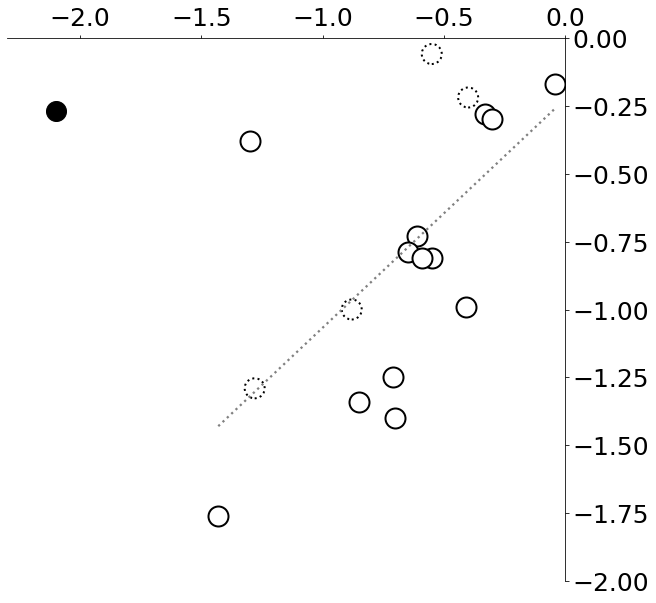

In [24]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,10))
#ax.axhline(y=0, color='black', linewidth=1.0, linestyle='--')

# normal data
ax.scatter(gcm_x_numplot,gcm_y_numplot, marker='o', color='white',edgecolors='black', linewidths=2, s=400, label='GCM')
ax.scatter(rcm_x_numplot,rcm_y_numplot, marker='o', color='white', edgecolors='black',ls=':', linewidths=2, s=400, label='RCM')
ax.scatter(icon_x_numplot,icon_y_numplot, marker='o', color='black', s=400, label='ICON')

# Linear regression
x = gcm_x_numplot + rcm_x_numplot 
y = gcm_y_numplot + rcm_y_numplot 

#x_below_05 = filtered_gcm_et #+ filtered_rcm_et
#y_below_05 = filtered_gcm_pr #+ filtered_rcm_pr

x1 = x 
y1 = y

# gcm
x_gcm = gcm_x_numplot  
y_gcm = gcm_y_numplot  

x1_gcm = x_gcm + gcm_x_numplot
y1_gcm = y_gcm + gcm_y_numplot

# rcm
x_rcm = rcm_x_numplot 
y_rcm = rcm_y_numplot

x1_rcm = x + rcm_x_numplot
y1_rcm = y + rcm_y_numplot

# values below 0.5
#x2 = x_below_05
#y2 = y_below_05

sns.regplot(x=x1, y=y1, scatter=False, ax=ax, color='grey', line_kws={"ls":':'}, ci=None)
#sns.regplot(x=x2, y=y2, scatter=False, ax=ax, color='red', ci=None)

# extend the line
#x2_range = np.linspace(min(x2)-1, max(x2), 100)
#slope, intercept = np.polyfit(x2, y2, 1)
#y2_range = slope * x2_range + intercept
#ax.plot(x2_range, y2_range, color='red', linestyle='--')

#sns.regplot(x=x_gcm, y=y_gcm, scatter=False, ax=ax, color='black', ci = None) # only gcm   
#sns.regplot(x=x_rcm, y=y_rcm, scatter=False, ax=ax,  color='black', line_kws={"ls":':'}, ci = None) # only rcm

# 1:1 line
#lims = [
#    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
#    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
#]
#ax.plot(lims, lims, 'k-', alpha=0.5, zorder=0)

ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")

ax.xaxis.tick_top()
ax.xaxis.set_label_position("top")

#ax.legend(fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
#ax.set_ylabel('$\Delta$Precipitation change [mm/day]',fontsize=25)
#plt.xlabel('$\Delta$Evaporation change [mm/day]',fontsize=25)
plt.xlim(-2.3, 0)
plt.ylim(-2.0, 0)
#ax.tick_params(axis='both', which='major', pad=25)

ax.spines[['left', 'bottom']].set_visible(False)

plt.show()

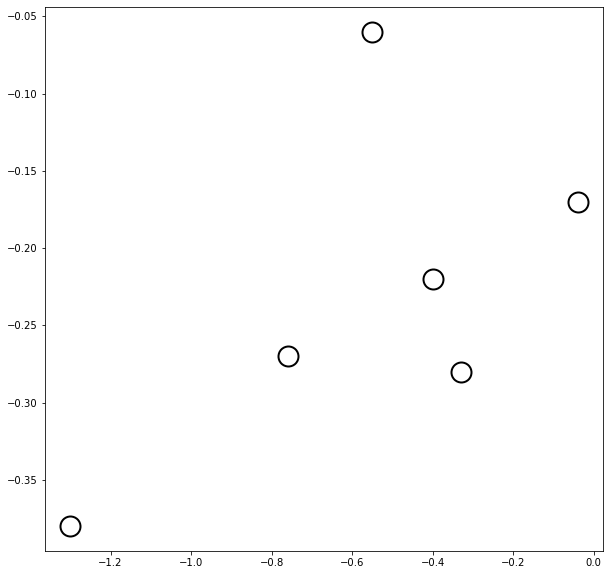

In [14]:
data = {
    'dET' : [-0.33, -0.76, -1.30, -0.04, np.nan, -0.4, -0.55],
    'dP' : [-0.28, -0.27, -0.38, -0.17, -0.41, -0.22, -0.06]}

df = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in data.items() ]))

x = df['dET'].values
y = df['dP'].values

x_numplot = [float(i) for i in x]
y_numplot = [float(i) for i in y]

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(x_numplot,y_numplot, marker='o', color='white',edgecolors='black', linewidths=2, s=400, label='GCM')
#ax.scatter(rcm_x_numplot,rcm_y_numplot, marker='o', color='white', edgecolors='black',ls=':', linewidths=2, s=400, label='RCM')

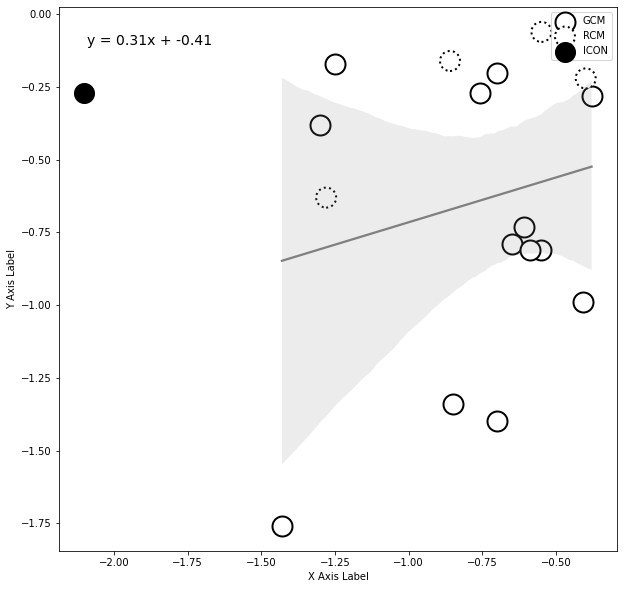

Slope: 0.3084417686282125
Intercept: -0.4062928076649188


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
import pandas as pd
import numpy as np

# Assuming gcm_x_numplot, gcm_y_numplot, rcm_x_numplot, rcm_y_numplot, icon_x_numplot, and icon_y_numplot are lists or arrays

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Scatter plots for GCM, RCM, and ICON
ax.scatter(gcm_x_numplot, gcm_y_numplot, marker='o', color='white', edgecolors='black', linewidths=2, s=400, label='GCM')
ax.scatter(rcm_x_numplot, rcm_y_numplot, marker='o', color='white', edgecolors='black', linestyle=':', linewidths=2, s=400, label='RCM')
ax.scatter(icon_x_numplot, icon_y_numplot, marker='o', color='black', s=400, label='ICON')

# Combine the data into a DataFrame
x = gcm_x_numplot + rcm_x_numplot
y = gcm_y_numplot + rcm_y_numplot

data = pd.DataFrame({'x': x, 'y': y})

# Drop rows with NaN values
data = data.dropna()

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(data['x'], data['y'])

# Plot the regression line using seaborn
sns.regplot(x=data['x'], y=data['y'], scatter=False, ax=ax, color='grey')

# Add the regression equation to the plot
regression_equation = f'y = {slope:.2f}x + {intercept:.2f}'
ax.text(0.05, 0.95, regression_equation, transform=ax.transAxes, fontsize=14, verticalalignment='top')

# Add labels and legend
ax.set_xlabel('X Axis Label')
ax.set_ylabel('Y Axis Label')
ax.legend()

# Show the plot
plt.show()

# Print the slope and y-intercept
print(f'Slope: {slope}')
print(f'Intercept: {intercept}')


## dP/dE

In [32]:
gcm_dp_de = gcm_y/gcm_x
rcm_dp_de = rcm_y/rcm_x
icon_dp_de = icon_y/icon_x

In [36]:
gcm_dpde_numplot = [float(i) for i in gcm_dp_de]
rcm_dpde_numplot = [float(i) for i in rcm_dp_de]
icon_dpde_numplot = [float(i) for i in icon_dp_de]

In [40]:
print(icon_dpde_numplot)

[0.1285714285714286]


In [76]:
import pandas as pd
import matplotlib.pyplot as plt

# Example data (replace this with your actual data)
data = {
    'Paper': ['GCM','GCM', 'GCM', 'GCM', 'GCM','GCM', 'GCM', 'GCM', 'GCM', 'GCM', 'GCM', 'GCM', 'GCM', 'GCM', 'RCM','RCM','RCM','RCM','ICON'],
    'dPdE': [1.5764705882352943, 1.2307692307692308, 2.0, 1.4727272727272727, 0.736842105263158, 0.35526315789473684, 2.4146341463414633, 1.1967213114754098, 1.2153846153846155, 0.2923076923076923, 1.3728813559322035, 0.28571428571428575, np.nan, 0.136, 
            0.18604651162790697, 0.4921875, 0.5499999999999999, 0.10909090909090907,
           0.1285714285714286]}

df = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in data.items() ]))

# Define markers and line styles for each type of data
marker_styles = {'GCM': 'o', 'RCM': 'o', 'ICON': 'o'}
color_styles = {'GCM': 'black', 'RCM': 'black', 'ICON': 'black'}
line_styles = {'GCM': '-', 'RCM': ':', 'ICON': '-'}

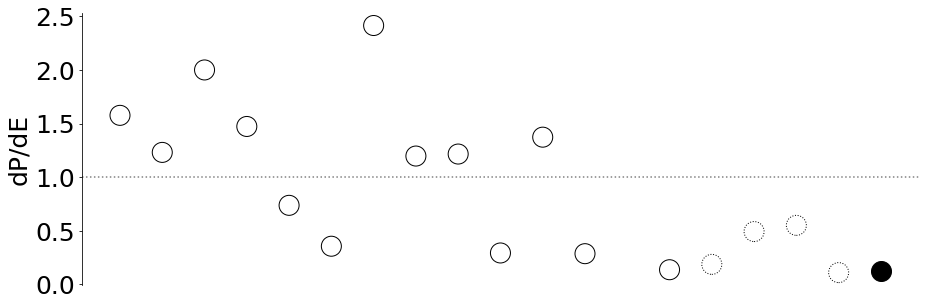

In [80]:
fig, ax = plt.subplots(figsize=(15, 5))

# Plot all data points with specified line styles and markers
for index, row in df.iterrows():
    paper = row['Paper']
    if paper in ['GCM', 'RCM']:
        ax.scatter(x_values[index], row['dPdE'], marker=marker_styles[paper], facecolors='none', edgecolors='black', linestyle=line_styles[paper], label=paper,s=400)
    else:
        ax.scatter(x_values[index], row['dPdE'], marker=marker_styles[paper], linestyle=line_styles[paper], label=paper, c='black',s=400)


ax.set_ylabel('dP/dE', fontsize=25)
ax.set_xlabel('')
ax.set_xticks([])  # Remove x-axis ticks

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

ax.spines[['right', 'bottom', 'top']].set_visible(False)
plt.axhline(y=1, c='grey', ls=':')
plt.show()

## Relative change (\Delta_ET/ET) in evaporation and precipitation

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Example data (replace this with your actual data)
data = {
    'Paper': ['GCM_T3','GCM_B3', 'GCM', 'GCM', 'GCM','GCM', 'GCM_T3', 'GCM_B3', 'GCM','GCM', 'GCM', 'RCM_B3','RCM_T3','ICON'],
    'dET/ET': [-0.7/5.15, -0.85/2.28, -1.43/3.90, -0.7/3.50, -0.55/2.28, -0.38/3.21, -0.76/4.45, -0.41/3.11, -0.61/3.84, -0.65/2.28, -1.30/3.97, -0.4/2.90, -0.55/4.4, -2.10/4.46], # gcm 11, rcm 2, icon
    'PR': [-1.24, -1.34, -1.76, -1.4, -0.81, -0.28, -0.27, -0.99, -0.73, -0.79, -0.38, -0.22, -0.06, -0.27]}

df = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in data.items() ]))

# Define the x-axis positions for each period (Annual, Dry, Wet)
x_positions = {'Annual': 1, 'Dry': 2, 'Wet': 3}

# Define marker styles for each category
marker_styles = {'GCM': 'O', 'RCM': 'O', 'ICON': 'O', 'GCM_T3': '^', 'GCM_B3': 'v', 'RCM_T3': '^', 'RCM_B3': 'v'}
#marker_styles = {'o', 's', '^'}  #1, 3, 2
colors = {'GCM':'black', 'RCM':'blue', 'ICON':'red', 'GCM_T3': 'black', 'GCM_B3': 'black', 'RCM_T3': 'blue', 'RCM_B3': 'blue'}
#marker_styles = {'GCM': 'O', 'RCM': '^', 'ICON': 's'}

In [51]:
# gcm
gcm_x = df[df['Paper'] == 'GCM']['dET/ET'].values
gcm_y = df[df['Paper'] == 'GCM']['PR'].values

In [52]:
gcm_x_numplot = [float(i) for i in gcm_x]
gcm_y_numplot = [float(i) for i in gcm_y]

In [53]:
#rcm
rcm_x = df[df['Paper'] == 'RCM']['dET/ET'].values
rcm_y = df[df['Paper'] == 'RCM']['PR'].values

In [54]:
rcm_x_numplot = [float(i) for i in rcm_x]
rcm_y_numplot = [float(i) for i in rcm_y]

In [55]:
icon_x = df[df['Paper'] == 'ICON']['dET/ET'].values
icon_y = df[df['Paper'] == 'ICON']['PR'].values

In [56]:
icon_x_numplot = [float(i) for i in icon_x]
icon_y_numplot = [float(i) for i in icon_y]

In [57]:
# top3
gcm_t3_x = df[df['Paper'] == 'GCM_T3']['dET/ET'].values
gcm_t3_y = df[df['Paper'] == 'GCM_T3']['PR'].values
rcm_t3_x = df[df['Paper'] == 'RCM_T3']['dET/ET'].values
rcm_t3_y = df[df['Paper'] == 'RCM_T3']['PR'].values

# bottom3
gcm_b3_x = df[df['Paper'] == 'GCM_B3']['dET/ET'].values
gcm_b3_y = df[df['Paper'] == 'GCM_B3']['PR'].values
rcm_b3_x = df[df['Paper'] == 'RCM_B3']['dET/ET'].values
rcm_b3_y = df[df['Paper'] == 'RCM_B3']['PR'].values

In [58]:
gcm_t3_x_numplot = [float(i) for i in gcm_t3_x]
gcm_t3_y_numplot = [float(i) for i in gcm_t3_y]

gcm_b3_x_numplot = [float(i) for i in gcm_b3_x]
gcm_b3_y_numplot = [float(i) for i in gcm_b3_y]

rcm_t3_x_numplot = [float(i) for i in rcm_t3_x]
rcm_t3_y_numplot = [float(i) for i in rcm_t3_y]

rcm_b3_x_numplot = [float(i) for i in rcm_b3_x]
rcm_b3_y_numplot = [float(i) for i in rcm_b3_y]

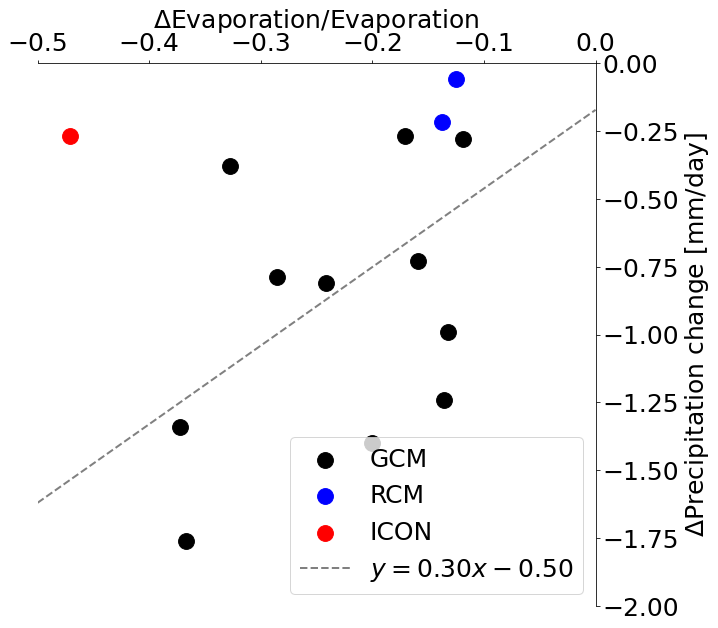

In [63]:
#marker = ['o', '^', 's']
colors = ['black', 'blue', 'red']

fig, ax = plt.subplots(figsize=(10,10))
#ax.axhline(y=0, color='black', linewidth=1.0, linestyle='--')
# normal data
ax.scatter(gcm_x_numplot,gcm_y_numplot, marker='o', color='black', s=250, label='GCM')
ax.scatter(rcm_x_numplot,rcm_y_numplot, marker='o', color='blue', s=250, label='RCM')
ax.scatter(icon_x_numplot,icon_y_numplot, marker='o', color='red', s=250, label='ICON')

# top3 ( marker='^')
ax.scatter(gcm_t3_x_numplot,gcm_t3_y_numplot, marker='o', color='black', s=250)
ax.scatter(rcm_t3_x_numplot,rcm_t3_y_numplot, marker='o', color='blue', s=250)

# bottom3 ( marker='v')
ax.scatter(gcm_b3_x_numplot,gcm_b3_y_numplot, marker='o', color='black', s=250)
ax.scatter(rcm_b3_x_numplot,rcm_b3_y_numplot, marker='o', color='blue', s=250)

# linear regression
x = gcm_x_numplot + gcm_t3_x_numplot + gcm_b3_x_numplot + rcm_x_numplot + rcm_t3_x_numplot + rcm_b3_x_numplot 
y = gcm_y_numplot + gcm_t3_y_numplot + gcm_b3_y_numplot + rcm_y_numplot + rcm_t3_y_numplot + rcm_b3_y_numplot

#x1 = x+icon_x_numplot
#y1 = y+icon_y_numplot
m1, b1 = np.polyfit(x, y, 1)
plt.axline(xy1=(0, b1), slope=m1, color='grey', ls='--', linewidth=2, label=f'$y = {m:.2f}x {b:+.2f}$')
#sns.regplot(x=x, y=y, scatter=False, ax=ax)

ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")

ax.xaxis.tick_top()
ax.xaxis.set_label_position("top")

ax.legend(fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
ax.set_ylabel('$\Delta$Precipitation change [mm/day]',fontsize=25)
plt.xlabel('$\Delta$Evaporation/Evaporation',fontsize=25)
plt.xlim(-0.5, 0)
plt.ylim(-2.0, 0)
#ax.tick_params(axis='both', which='major', pad=25)

ax.spines[['left', 'bottom']].set_visible(False)

plt.show()

## Latent heat from CTL

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Example data (replace this with your actual data)
data = {
    'Paper': ['N91', 'L&W89', 'H&D97', 'L&R93', 'D&S94', 'K&H', 'C&F', 'S88','R1', 'R2', 'G&V00', 'L&R97', 'D&K92','L14', 'L18', 'B17','FLX','ICON'],
    'LH': [113, 90.3, 90, 66, 93, 115, 111, 109, 149, 105, 66, 129, 101, 84, 127.3, 111.3, 88.7, 129]}

df = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in data.items() ]))

colors = {'ICON':'blue'}

(70.0, 160.0)

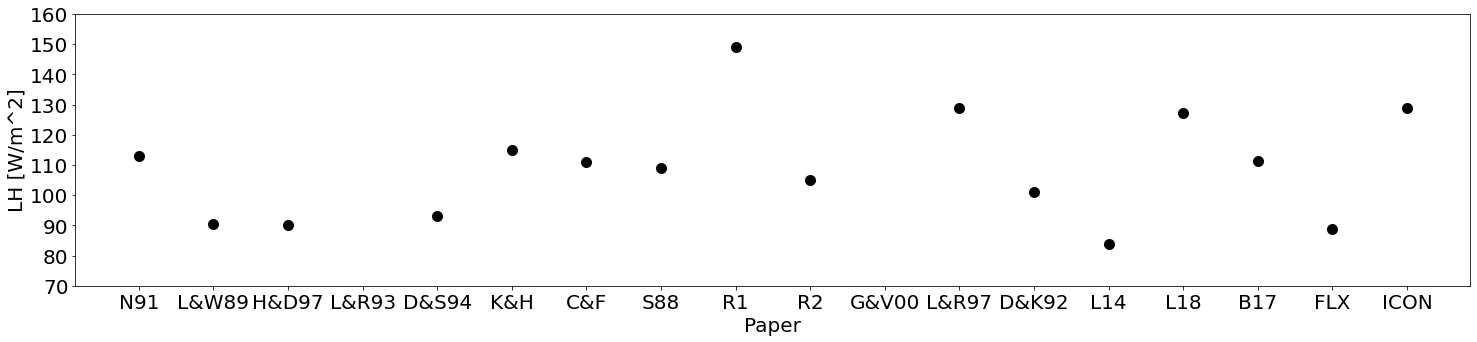

In [3]:
df.plot.scatter(x='Paper', y='LH', s=100, figsize=(25,5), fontsize=20, color='black')
plt.xlabel('Paper',fontsize=20)
plt.ylabel('LH [W/m^2]',fontsize=20)
plt.ylim(70, 160)